In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn import model_selection,preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

import nn_utils

%matplotlib inline

2023-04-07 08:06:22.617017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Exercise 1 (1 point):

In [2]:
var_names = ["total_hits2","total_ring_PEs2","recoDWallR2","recoDWallZ2","lambda_max_2","trueKE"]

In [3]:
numu = pd.read_csv("numu_energy_studies.csv",index_col=0)

In [4]:
numu.head(5)

,i,neutrinoE,trueKE,recoE_lookup,total_PMTs_hits2,total_hits2,total_ring_PEs2,pot_length2,hits_pot_length2,recoDWallR2,recoDWallZ2,lambda_max_2,recoDWall_2,recoToWall_2,vtxTrackBias_2
0,0,664.541,236.327,22.35380,0.000000,0.023325,0.00000,0.662787,0.003754,0.003389,0.458415,0.650854,0.003389,0.220977,-0.011905
1,3,400.551,186.765,2.46971,0.000000,0.010075,0.00000,0.662787,0.001621,0.003389,0.458415,0.405903,0.003389,0.220977,-2.269040
2,4,633.353,448.481,409.95400,0.308444,0.080400,0.13070,0.531171,0.016146,0.035389,0.753969,0.537975,0.035389,0.494926,0.024453
3,7,845.921,586.647,37.83740,0.000000,0.011950,0.00000,0.918554,0.001388,0.042498,0.083664,0.830098,0.042498,0.805578,-0.007114
4,9,1323.140,963.822,1408.07000,0.111333,0.142300,0.26265,0.093641,0.162093,0.616305,0.164307,0.092105,0.358487,0.135845,-0.004307


Dataset has been loaded well

### Check need for data cleaning

In [5]:
numu.isna().sum()

i                      0
neutrinoE              0
trueKE                 0
recoE_lookup           0
total_PMTs_hits2       0
total_hits2            0
total_ring_PEs2        0
pot_length2         2594
hits_pot_length2       0
recoDWallR2            0
recoDWallZ2            0
lambda_max_2           0
recoDWall_2            0
recoToWall_2        2593
vtxTrackBias_2      2593
dtype: int64

Original numu dataset has missing values, therefore we can drop these columns

In [6]:
numu.dropna(inplace= True)

In [7]:
numu.isna().sum()

i                   0
neutrinoE           0
trueKE              0
recoE_lookup        0
total_PMTs_hits2    0
total_hits2         0
total_ring_PEs2     0
pot_length2         0
hits_pot_length2    0
recoDWallR2         0
recoDWallZ2         0
lambda_max_2        0
recoDWall_2         0
recoToWall_2        0
vtxTrackBias_2      0
dtype: int64

Columns with missing values now removed

### Plot the 6 variables

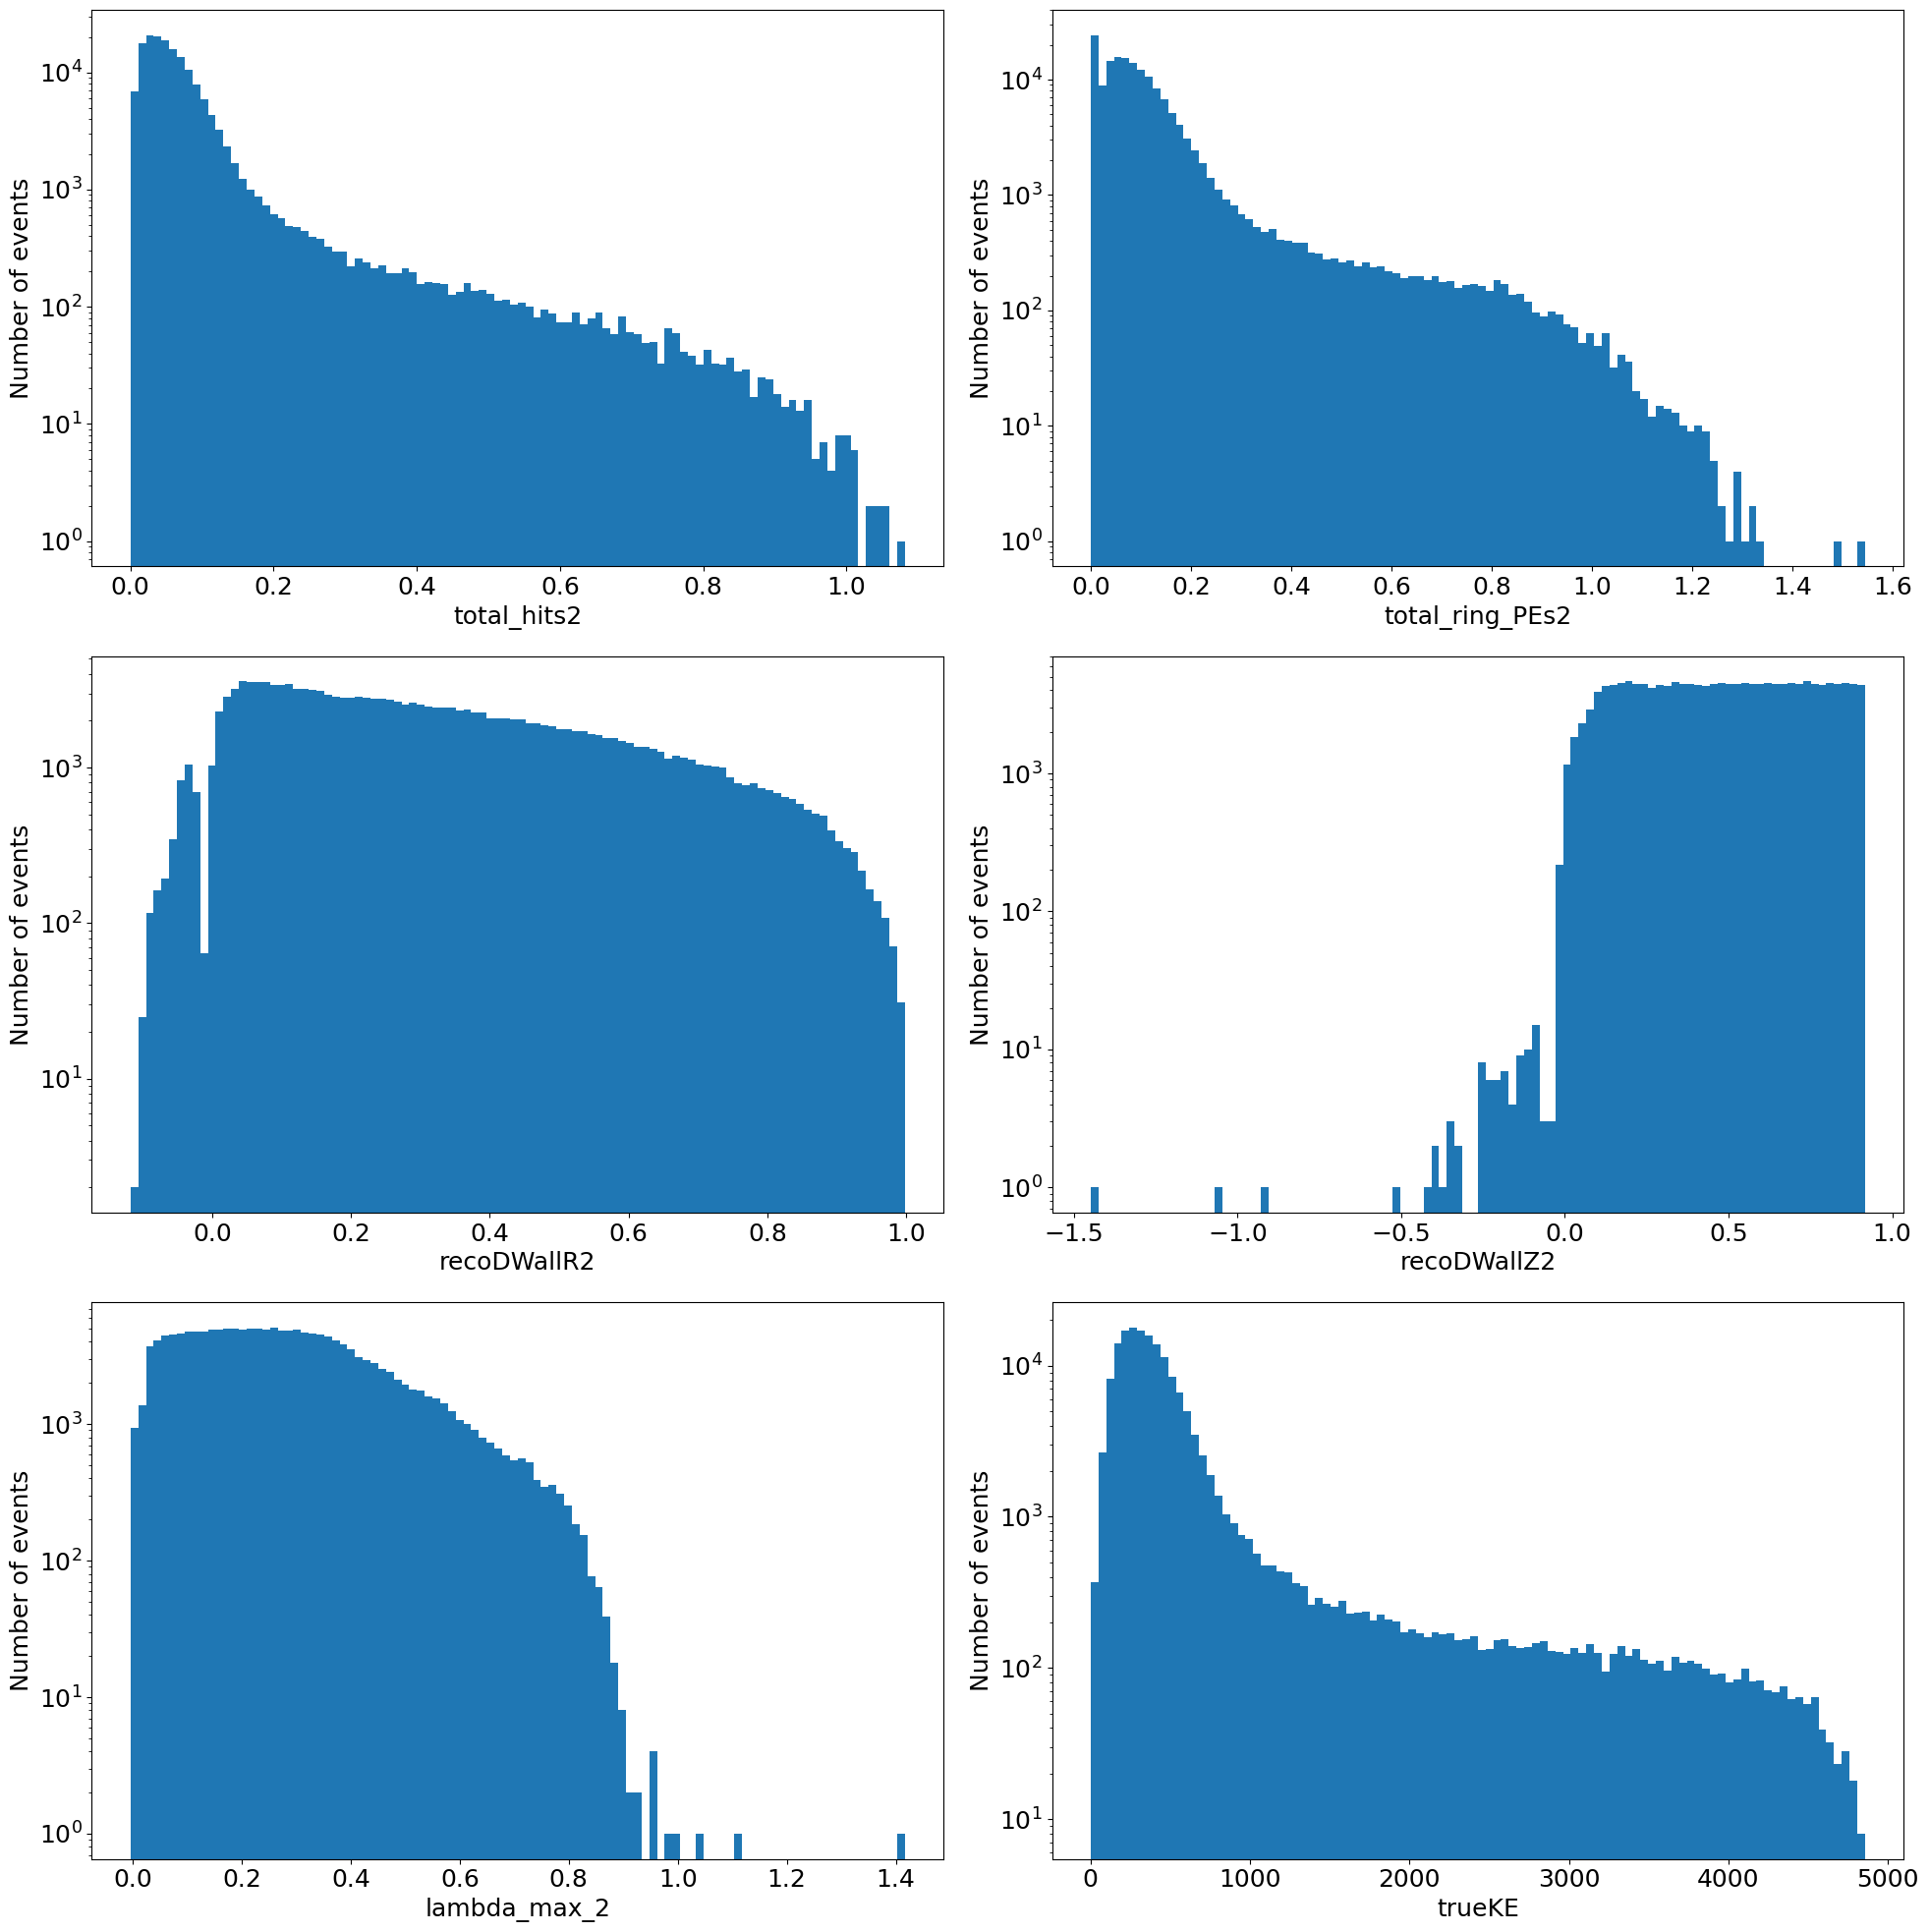

In [8]:
plt.figure(figsize=(20,20))
plt.rcParams.update({'font.size': 18})

for i, var in enumerate(var_names):
    ax = plt.subplot(3,2,i+1)
    plt.hist(numu[var],bins=100)

    plt.xlabel(var)
    plt.ylabel("Number of events")  
    plt.yscale("log")
    
plt.tight_layout()
plt.show()

## Exercise 2 (4 points):

Creating a numu subset dataframe to store only the relevant variables for this analysis

In [9]:
numu_subset = numu[var_names]

In [10]:
numu_subset.head(5)

,total_hits2,total_ring_PEs2,recoDWallR2,recoDWallZ2,lambda_max_2,trueKE
0,0.023325,0.00000,0.003389,0.458415,0.650854,236.327
1,0.010075,0.00000,0.003389,0.458415,0.405903,186.765
2,0.080400,0.13070,0.035389,0.753969,0.537975,448.481
3,0.011950,0.00000,0.042498,0.083664,0.830098,586.647
4,0.142300,0.26265,0.616305,0.164307,0.092105,963.822


Looks good

In [11]:
input_features = numu_subset.drop(columns="trueKE",axis=1)

In [12]:
target = numu_subset["trueKE"]

In [13]:
Answer_to_all_questions = 42
# train-test split of dataset
x_train, x_test, y_train, y_test = model_selection.train_test_split(\
input_features, target, test_size = 0.3, random_state = Answer_to_all_questions) 
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(114514, 5) (49078, 5) (114514,) (49078,)


### a)

In [14]:
def my_model():
    # create model
    model = Sequential()
    model.add(Dense(num_nodes, input_dim=num_inputs, kernel_initializer="normal", activation="relu"))
    model.add(Dropout(drop_out))
    for i in range (extra_depth):
    # code up the extra layers here
        model.add(Dense(num_nodes, kernel_initializer="normal", activation="relu"))
        model.add(Dropout(drop_out))
    model.add(Dense(num_outputs, kernel_initializer ="normal"))
    # Compile model
    model.compile(loss="mean_squared_error",optimizer="adam")
    return model

In [15]:
num_nodes = 30
extra_depth = 1
drop_out = 0.1
num_inputs = 5
num_outputs = 1

batchSize = 256
N_epochs = 50

In [16]:
callbacks_ = [
# if we don’t have an increase of the accuracy for 10 epochs, terminate training.
EarlyStopping(verbose = True, patience=10, monitor = "loss") ,
# Always make sure that we’re saving the model weights with the best accuracy.
ModelCheckpoint("model.h5", monitor = "loss" , verbose =0, save_best_only = True, mode = "max")]

In [17]:
np.random.seed(Answer_to_all_questions)
estimators = []
estimators.append(("mlp", KerasRegressor(build_fn = my_model, epochs = N_epochs,
batch_size = batchSize, verbose = 1)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits = 10, random_state = Answer_to_all_questions, shuffle = True)
results = cross_val_score(pipeline, x_train, y_train, cv = kfold,
                          fit_params = {"mlp__callbacks": callbacks_} ,scoring ="r2")

/tmp/ipykernel_740423/93309516.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimators.append(("mlp", KerasRegressor(build_fn = my_model, epochs = N_epochs,
2023-04-07 08:06:26.045921: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
403/403 [==============================] - 1s 2ms/step - loss: 554236.6250
Epoch 2/50
403/403 [==============================] - 1s 2ms/step - loss: 312831.9688
Epoch 3/50
403/403 [==============================] - 1s 2ms/step - loss: 250082.5000
Epoch 4/50
403/403 [==============================] - 1s 2ms/step - loss: 160247.9531
Epoch 5/50
403/403 [==============================] - 1s 2ms/step - loss: 118192.2891
Epoch 6/50
403/403 [==============================] - 1s 2ms/step - loss: 113478.7656
Epoch 7/50
403/403 [==============================] - 1s 2ms/step - loss: 112570.0547
Epoch 8/50
403/403 [==============================] - 1s 2ms/step - loss: 111689.3438
Epoch 9/50
403/403 [==============================] - 1s 2ms/step - loss: 111288.0938
Epoch 10/50
403/403 [==============================] - 1s 2ms/step - loss: 110678.9688
Epoch 11/50
403/403 [==============================] - 1s 2ms/step - loss: 111052.0078
Epoch 12/50
403/403 [==============================]

In [18]:
print("Result: %.2f %s %.2f" %(results.mean(), u"\u00B1", results.std())) 

Result: 0.75 ± 0.01


This $R^2$ value is within the acceptable range

### b)

In [19]:
model=my_model() # Define the model
history=model.fit(x_train,y_train,epochs=N_epochs,batch_size=batchSize,callbacks=callbacks_,\
                 validation_data=(x_test, y_test))

Epoch 1/50
448/448 [==============================] - 1s 3ms/step - loss: 542228.1250 - val_loss: 340661.5312
Epoch 2/50
448/448 [==============================] - 1s 2ms/step - loss: 306227.6562 - val_loss: 271627.0625
Epoch 3/50
448/448 [==============================] - 1s 2ms/step - loss: 235695.9219 - val_loss: 177127.5000
Epoch 4/50
448/448 [==============================] - 1s 2ms/step - loss: 144034.7500 - val_loss: 111463.0859
Epoch 5/50
448/448 [==============================] - 1s 2ms/step - loss: 116205.5469 - val_loss: 105143.7969
Epoch 6/50
448/448 [==============================] - 1s 2ms/step - loss: 114216.3047 - val_loss: 104113.8281
Epoch 7/50
448/448 [==============================] - 1s 2ms/step - loss: 113288.5703 - val_loss: 103298.4531
Epoch 8/50
448/448 [==============================] - 1s 2ms/step - loss: 112812.1641 - val_loss: 102893.9844
Epoch 9/50
448/448 [==============================] - 1s 2ms/step - loss: 111824.5469 - val_loss: 102330.2266
Epoch 10/5

### Plot the loss curves

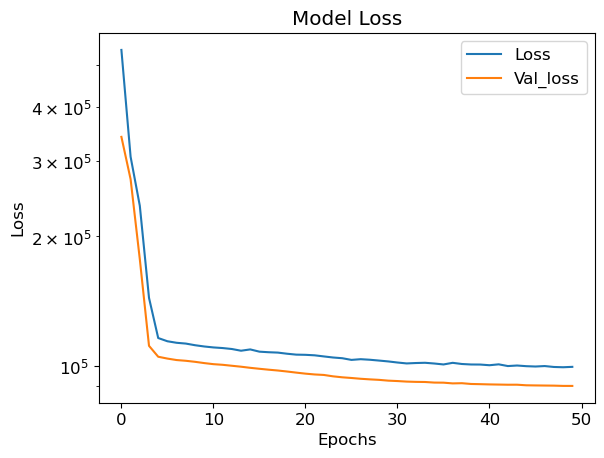

In [20]:
# Plotting the loss curves
plt.rcParams.update({'font.size': 12})
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.yscale("log")
plt.legend(["Loss","Val_loss"])
plt.show()

Both the loss and val_loss curves follow the same shape and the val_loss consistently descreases, so therefore there is no overfitting. The loss curves begin to plateau after around 5 epochs meaning that the model achieves good performance early on. 

In [21]:
# Predicting the energies
prediction = model.predict(x_test) 

1534/1534 [==============================] - 1s 765us/step


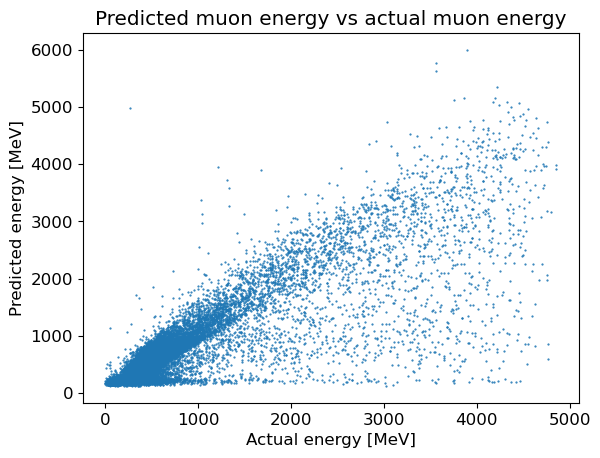

In [22]:
# Plot the predicted energy vs actual energy

plt.scatter(y_test,prediction,s=0.3)
plt.title("Predicted muon energy vs actual muon energy")
plt.xlabel("Actual energy [MeV]")
plt.ylabel("Predicted energy [MeV]")
plt.show()

The actual and predicted energy scatter plot shows a clearly visible linear relationship. This means that the regression has been successful in predicting most of the event energies based on the input variables we have used. However, the x=y relationship becomes weak at high energies indicating that higher energy events are harder to predict. The predicted energy is rarely over the x=y line, meaning that the NN regressor more often underpredicts the event energy.

## Exercise 3 (5 points)

### a)

In [23]:
gbr0 = GradientBoostingRegressor(n_estimators=100) # Creating the GBRT model
gbr0.fit(x_train, y_train.ravel())

GradientBoostingRegressor()

In [24]:
r2_train = gbr0.score(x_train,y_train) 
r2_test = gbr0.score(x_test,y_test)
print("R^2 of training data =", round(r2_train,4))
print("R^2 of testing data =", round(r2_test,4))

R^2 of training data = 0.7831
R^2 of testing data = 0.7818


The two number do not differ by much and therefore there is no sign of overfitting in the model.

The $R^2$ scores of the GBRT model are around 3% higher than the NN model. This shows that the GBRT model can predict the muon energies better than the NN model using the current input data.

### b)

In [25]:
# Performing gridsearch to look for best parameters

# Defining the parameter grid
param_grid_ = {
'n_estimators':[100],
'learning_rate':[0.1, 0.05],
'max_depth':[5, 10],
'min_samples_leaf':[50,100],
}

njobs_ = 8 # jobs to run in parallel
np.random.seed(Answer_to_all_questions)
gbr = GradientBoostingRegressor()
# Using HalvingGridSearchCV instead of GridSearchCV to get results quicker
classifier = HalvingGridSearchCV(estimator = gbr,cv = kfold, param_grid=param_grid_,
                            verbose=1,n_jobs=njobs_)

classifier.fit(x_train, y_train.ravel())


print("Best estimator:")
print(classifier.best_estimator_)

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 38171
max_resources_: 114514
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 38171
Fitting 10 folds for each of 8 candidates, totalling 80 fits
----------
iter: 1
n_candidates: 3
n_resources: 114513
Fitting 10 folds for each of 3 candidates, totalling 30 fits
Best estimator:
GradientBoostingRegressor(learning_rate=0.05, max_depth=10, min_samples_leaf=50)


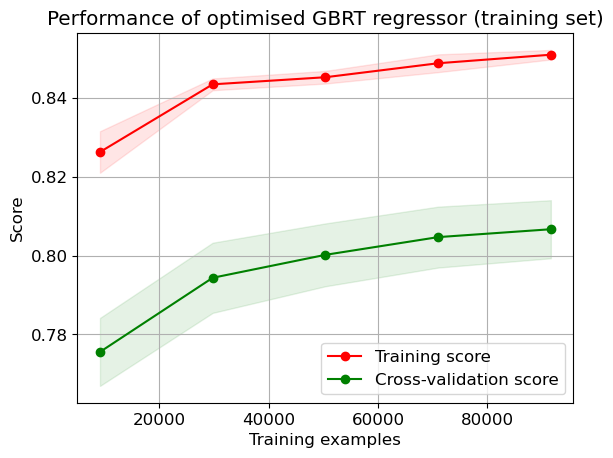

In [26]:
# Plotting the performance of the optimised regressor for the training set
# Using nn_utils python file to import plotting functionality

nn_utils.plot_learning_curve(classifier.best_estimator_, "Performance of optimised GBRT regressor (training set)", 
                             x_train, y_train, ylim=None, cv=None, n_jobs=8,
                             train_sizes=np.linspace(0.1, 1.0, 5)) 
plt.show()

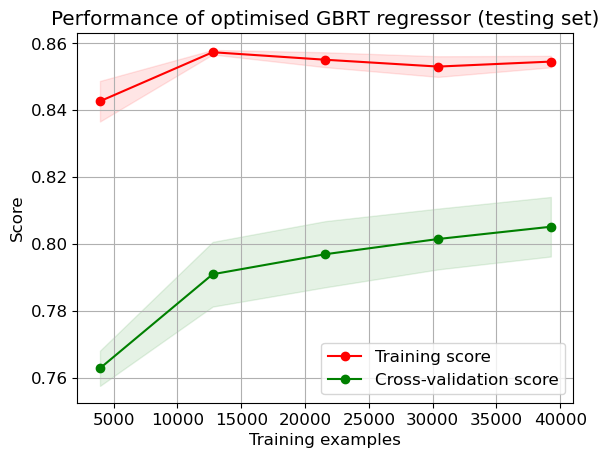

In [27]:
# Plotting the performance of the optimised regressor for the testing set
# Using nn_utils python file to import plotting functionality

nn_utils.plot_learning_curve(classifier.best_estimator_, "Performance of optimised GBRT regressor (testing set)", 
                             x_test, y_test, ylim=None, cv=None, n_jobs=8,
                             train_sizes=np.linspace(0.1, 1.0, 5)) # Using the import to plot the curve
plt.show()

Very similar results are achieved between the training and testing set scores.

### c)

In [28]:
#Creating new GBRT regressor with the optimal parameters

n_estimators = classifier.best_estimator_.n_estimators # Only one set of n_estimators was tested
max_depth = classifier.best_estimator_.max_depth # Optimal depth
min_samples_leaf = classifier.best_estimator_.min_samples_leaf # Optimal number of samples per leaf node
learning_rate = classifier.best_estimator_.learning_rate # Optimal learning rate

gbr1 = GradientBoostingRegressor(learning_rate=learning_rate, n_estimators=n_estimators, min_samples_leaf=min_samples_leaf,
                                 max_depth=max_depth)
GBR_results = cross_val_score(gbr1,x_train, y_train, cv = kfold, scoring="r2", n_jobs=8)

In [29]:
print("Result: %.4f %s %.4f" %(GBR_results.mean(), u"\u00B1", GBR_results.std()))

Result: 0.8062 ± 0.0124


The $R^2$ value of the optimised GBRT model increases by roughly 2% over the unoptimised model.

In [30]:
# Fit the optimised GBRT model
history_gbr1 = gbr1.fit(x_train,y_train)

In [31]:
# Get predictions of the fit GBRT model
prediction_gbr1 = gbr1.predict(x_test)

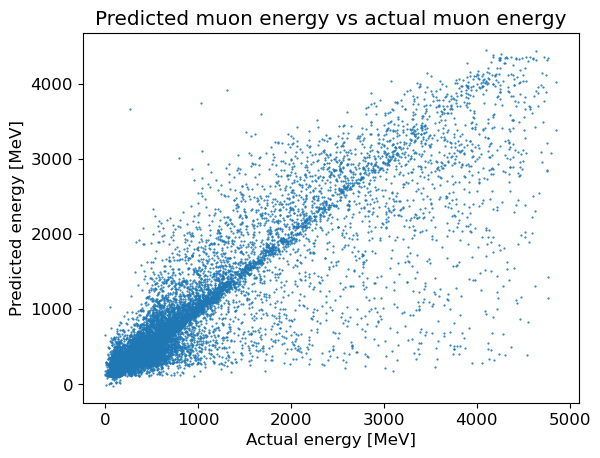

In [32]:
# Plot the predicted energy vs actual energy

plt.scatter(y_test,prediction_gbr1,s=0.3)
plt.title("Predicted muon energy vs actual muon energy")
plt.xlabel("Actual energy [MeV]")
plt.ylabel("Predicted energy [MeV]")
plt.show()

The linear relationship between the predicted and actual energies is much stronger for the GBRT compared to the NN regressor. This plot confirms the superior performance of the GBRT to predict the energies. The x=y linear relationship can now be seen to extend into the higher energies showing a that the GBRT predictions are more consistent over the full energy range.

In [33]:
sorted_importance = gbr1.feature_importances_[np.argsort(gbr1.feature_importances_)][::-1]

In [34]:
sorted_features = np.array(var_names)[np.argsort(gbr1.feature_importances_)][::-1]

Ordered features by importance

In [35]:
for i in range(5):
    print(sorted_features[i],":",round(sorted_importance[i],4))

total_ring_PEs2 : 0.7676
total_hits2 : 0.1061
lambda_max_2 : 0.0686
recoDWallZ2 : 0.0293
recoDWallR2 : 0.0285


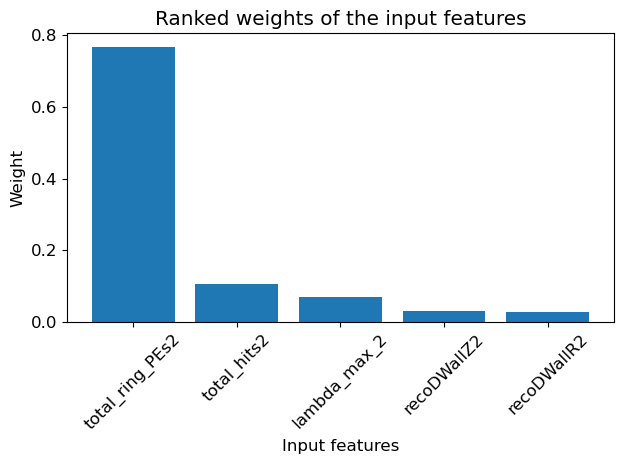

In [39]:
plt.bar(np.arange(1,6), sorted_importance)
plt.xticks(np.arange(1,6),sorted_features)
plt.title("Ranked weights of the input features")
plt.xlabel("Input features")
plt.ylabel("Weight")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()